# 日期和时间数据类型与工具

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2017, 1, 19, 21, 15, 7, 671951)

In [4]:
now.year, now.month, now.day

(2017, 1, 19)

In [5]:
delta = datetime(2017,1,15) - datetime(2017,1,1,7,0)

In [6]:
delta

datetime.timedelta(13, 61200)

In [7]:
delta.days, delta.seconds

(13, 61200)

In [8]:
from datetime import timedelta

In [9]:
start = datetime(2017, 1, 1)

In [10]:
start + timedelta(14)

datetime.datetime(2017, 1, 15, 0, 0)

In [11]:
start - 2 * timedelta(7)

datetime.datetime(2016, 12, 18, 0, 0)

## 字符串和datetime的相互转换

In [12]:
stamp = datetime(2017, 1, 1)

In [13]:
str(stamp)

'2017-01-01 00:00:00'

In [14]:
stamp.strftime("%Y-%m-%d")

'2017-01-01'

In [15]:
value = '2012-1-9'

In [16]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2012, 1, 9, 0, 0)

In [17]:
datestrs = ['7/6/2011', '11/12/2014']

In [18]:
[datetime.strptime(v, '%m/%d/%Y') for v in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2014, 11, 12, 0, 0)]

In [19]:
from dateutil.parser import parse

In [20]:
parse('2005-10-1')

datetime.datetime(2005, 10, 1, 0, 0)

In [21]:
parse('Jan, 3rd, 2018, 10:20PM')

datetime.datetime(2018, 1, 3, 22, 20)

In [22]:
parse('12/1/2011', dayfirst = True)

datetime.datetime(2011, 1, 12, 0, 0)

In [23]:
datestrs

['7/6/2011', '11/12/2014']

In [24]:
import pandas as pd

In [25]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2014-11-12'], dtype='datetime64[ns]', freq=None)

In [26]:
idx = pd.to_datetime(datestrs + [None])

In [27]:
idx

DatetimeIndex(['2011-07-06', '2014-11-12', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
idx[2]

NaT

In [29]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

# 时间序列基础

In [30]:
import numpy as np

In [31]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),  datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [32]:
ts = pd.Series(np.random.randn(6), index = dates)

In [33]:
ts

2011-01-02   -0.750231
2011-01-05   -0.316686
2011-01-07    0.802621
2011-01-08    1.408483
2011-01-10   -0.481414
2011-01-12   -0.371864
dtype: float64

In [34]:
type(ts)

pandas.core.series.Series

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [36]:
type(ts.index)

pandas.tseries.index.DatetimeIndex

In [37]:
ts + ts[::2]

2011-01-02   -1.500463
2011-01-05         NaN
2011-01-07    1.605243
2011-01-08         NaN
2011-01-10   -0.962829
2011-01-12         NaN
dtype: float64

In [38]:
ts.index.dtype

dtype('<M8[ns]')

In [39]:
stamp = ts.index[0]

In [40]:
stamp

Timestamp('2011-01-02 00:00:00')

## 索引、选取、子集构造

In [41]:
stamp = ts.index[2]

In [42]:
ts[stamp]

0.80262139554674905

In [43]:
ts['1/10/2011']

-0.48141425961840317

In [44]:
ts['20110110']

-0.48141425961840317

In [45]:
longer_ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2001', periods = 1000))

In [46]:
longer_ts.head()

2001-01-01   -1.012983
2001-01-02   -0.971265
2001-01-03    0.245206
2001-01-04   -0.128094
2001-01-05    0.196430
Freq: D, dtype: float64

In [47]:
longer_ts['2001']

2001-01-01   -1.012983
2001-01-02   -0.971265
2001-01-03    0.245206
2001-01-04   -0.128094
2001-01-05    0.196430
2001-01-06    0.692633
2001-01-07   -0.211627
2001-01-08   -0.281270
2001-01-09   -0.331271
2001-01-10    0.390725
2001-01-11   -0.658821
2001-01-12   -0.910942
2001-01-13   -0.425586
2001-01-14    0.912780
2001-01-15   -0.948308
2001-01-16    1.374816
2001-01-17    0.731262
2001-01-18   -0.408122
2001-01-19    0.122534
2001-01-20   -0.433120
2001-01-21   -0.288725
2001-01-22    0.269208
2001-01-23    1.167042
2001-01-24   -2.798908
2001-01-25   -1.303023
2001-01-26   -1.245127
2001-01-27    0.020790
2001-01-28    0.135452
2001-01-29   -0.105950
2001-01-30   -1.677359
                ...   
2001-12-02   -0.737770
2001-12-03   -0.289096
2001-12-04   -0.156651
2001-12-05    0.794333
2001-12-06    0.678840
2001-12-07   -1.563578
2001-12-08    1.387800
2001-12-09    0.392282
2001-12-10    1.389339
2001-12-11   -0.771149
2001-12-12    0.057591
2001-12-13   -0.687909
2001-12-14 

In [48]:
longer_ts['2001-12']

2001-12-01   -0.588832
2001-12-02   -0.737770
2001-12-03   -0.289096
2001-12-04   -0.156651
2001-12-05    0.794333
2001-12-06    0.678840
2001-12-07   -1.563578
2001-12-08    1.387800
2001-12-09    0.392282
2001-12-10    1.389339
2001-12-11   -0.771149
2001-12-12    0.057591
2001-12-13   -0.687909
2001-12-14   -0.022794
2001-12-15   -0.598622
2001-12-16    0.725840
2001-12-17   -0.645698
2001-12-18   -1.034104
2001-12-19    0.388892
2001-12-20   -0.878461
2001-12-21    0.666998
2001-12-22   -0.740643
2001-12-23   -0.384205
2001-12-24    1.510418
2001-12-25    1.397247
2001-12-26    0.639213
2001-12-27    0.406788
2001-12-28    0.144301
2001-12-29    0.678750
2001-12-30   -0.824062
2001-12-31   -1.329484
Freq: D, dtype: float64

In [49]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.802621
2011-01-08    1.408483
2011-01-10   -0.481414
2011-01-12   -0.371864
dtype: float64

In [50]:
ts

2011-01-02   -0.750231
2011-01-05   -0.316686
2011-01-07    0.802621
2011-01-08    1.408483
2011-01-10   -0.481414
2011-01-12   -0.371864
dtype: float64

In [51]:
ts['1/6/2011': '1/11/2011']

2011-01-07    0.802621
2011-01-08    1.408483
2011-01-10   -0.481414
dtype: float64

In [52]:
ts.truncate(after = '1/8/2011')

2011-01-02   -0.750231
2011-01-05   -0.316686
2011-01-07    0.802621
2011-01-08    1.408483
dtype: float64

In [53]:
dates = pd.date_range('1/1/2000', periods = 100, freq = 'W-WED')

In [54]:
long_df = pd.DataFrame(np.random.randn(100, 4), index = dates, columns = ['Colorado', 'Texas', 'New York', 'Ohio'])

In [55]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.056711,0.083109,0.000853,0.205696
2000-01-12,-0.398538,0.388305,-0.145470,0.643669
2000-01-19,-1.116489,-0.121523,2.107825,-1.456472
2000-01-26,1.176621,0.780730,-1.364184,0.298131
2000-02-02,-1.858756,-2.234234,-0.673235,0.027967
2000-02-09,1.570275,-0.855835,0.437270,-0.241531
2000-02-16,-1.628052,0.065063,-0.440713,-1.140917
2000-02-23,-0.017673,-1.092230,-2.203724,0.545370
2000-03-01,-0.399249,-0.171881,1.299838,-1.937004
2000-03-08,0.345253,-0.258122,-0.035959,0.662353


## 带有重复索引的时间序列

In [56]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

In [57]:
dup_ts = pd.Series(np.arange(5), index = dates)

In [58]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [59]:
dup_ts.index.is_unique

False

In [60]:
dup_ts['1/3/2000']

4

In [61]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [62]:
grouped = dup_ts.groupby(level = 0)

In [63]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [64]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 日期的范围、频率和移动

In [65]:
ts

2011-01-02   -0.750231
2011-01-05   -0.316686
2011-01-07    0.802621
2011-01-08    1.408483
2011-01-10   -0.481414
2011-01-12   -0.371864
dtype: float64

In [66]:
ts.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

## 生成日期范围

In [67]:
index = pd.date_range('4/1/2012', '6/1/2012')

In [68]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [69]:
pd.date_range(start = '4/1/2012', periods = 20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range(end = '6/1/2012', periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range('1/1/2000', '12/1/2000', freq = 'BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [72]:
pd.date_range('5/2/2012 12:56:31', periods = 5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range('5/2/2012 12:56:31', periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量

In [74]:
from pandas.tseries.offsets import Hour, Minute

In [75]:
hour = Hour()

In [76]:
hour

<Hour>

In [77]:
four_hrs = Hour(4)

In [78]:
four_hrs

<4 * Hours>

In [79]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [80]:
Hour(2) + Minute(45)

<165 * Minutes>

In [81]:
pd.date_range('1/1/2000', periods = 20, freq = '1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00',
               '2000-01-01 15:00:00', '2000-01-01 16:30:00',
               '2000-01-01 18:00:00', '2000-01-01 19:30:00',
               '2000-01-01 21:00:00', '2000-01-01 22:30:00',
               '2000-01-02 00:00:00', '2000-01-02 01:30:00',
               '2000-01-02 03:00:00', '2000-01-02 04:30:00'],
              dtype='datetime64[ns]', freq='90T')

### WOM日期

In [82]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq = 'WOM-3FRI')

In [83]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## 移动（超前和滞后）数据

In [84]:
ts = pd.Series(np.random.randn(4), 
               index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))

In [85]:
ts

2000-01-31   -0.173502
2000-02-29    0.740284
2000-03-31   -1.413779
2000-04-30    0.310278
Freq: M, dtype: float64

In [86]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.173502
2000-04-30    0.740284
Freq: M, dtype: float64

In [87]:
ts.shift(-2)

2000-01-31   -1.413779
2000-02-29    0.310278
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [88]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -5.266711
2000-03-31   -2.909779
2000-04-30   -1.219467
Freq: M, dtype: float64

In [89]:
ts.shift(2, freq = 'M')

2000-03-31   -0.173502
2000-04-30    0.740284
2000-05-31   -1.413779
2000-06-30    0.310278
Freq: M, dtype: float64

In [90]:
ts.shift(3, freq = 'D')

2000-02-03   -0.173502
2000-03-03    0.740284
2000-04-03   -1.413779
2000-05-03    0.310278
dtype: float64

In [91]:
ts.shift(1, freq = '3D')

2000-02-03   -0.173502
2000-03-03    0.740284
2000-04-03   -1.413779
2000-05-03    0.310278
dtype: float64

In [92]:
ts.shift(1, freq = '90T')

2000-01-31 01:30:00   -0.173502
2000-02-29 01:30:00    0.740284
2000-03-31 01:30:00   -1.413779
2000-04-30 01:30:00    0.310278
Freq: M, dtype: float64

### 通过偏移量对日期进行位移

In [93]:
from pandas.tseries.offsets import Day, MonthEnd

In [94]:
now = datetime.now()

In [95]:
now + 3 * Day()

Timestamp('2017-01-22 21:15:09.010757')

In [96]:
now + MonthEnd()

Timestamp('2017-01-31 21:15:09.010757')

In [97]:
now + MonthEnd(2)

Timestamp('2017-02-28 21:15:09.010757')

In [98]:
offset = MonthEnd()

In [99]:
offset.rollforward(now)

Timestamp('2017-01-31 21:15:09.010757')

In [100]:
offset.rollback(now)

Timestamp('2016-12-31 21:15:09.010757')

In [101]:
ts = pd.Series(np.random.randn(20), index = pd.date_range('1/15/2000', periods = 20, freq = '4d'))

In [102]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.104554
2000-02-29    0.151880
2000-03-31   -0.104137
dtype: float64

In [103]:
ts.resample('M', how = 'mean')

/home/yi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


2000-01-31   -0.104554
2000-02-29    0.151880
2000-03-31   -0.104137
Freq: M, dtype: float64

# 时区处理

In [104]:
import pytz

In [105]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [106]:
tz = pytz.timezone('US/Mountain')

In [107]:
tz

<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>

## 本地化和转换

In [108]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')

In [109]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [110]:
print ts.index.tz

None


In [111]:
pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D', tz = 'UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [112]:
ts_utc = ts.tz_localize('UTC')

In [113]:
ts_utc

2012-03-09 09:30:00+00:00   -0.661400
2012-03-10 09:30:00+00:00    0.300464
2012-03-11 09:30:00+00:00   -1.037241
2012-03-12 09:30:00+00:00    0.493891
2012-03-13 09:30:00+00:00    0.404685
2012-03-14 09:30:00+00:00    1.409064
Freq: D, dtype: float64

In [114]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [115]:
ts_utc.tz_convert('US/Mountain')

2012-03-09 02:30:00-07:00   -0.661400
2012-03-10 02:30:00-07:00    0.300464
2012-03-11 03:30:00-06:00   -1.037241
2012-03-12 03:30:00-06:00    0.493891
2012-03-13 03:30:00-06:00    0.404685
2012-03-14 03:30:00-06:00    1.409064
Freq: D, dtype: float64

In [116]:
ts_eastern = ts.tz_localize('US/Eastern')

In [117]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.661400
2012-03-10 14:30:00+00:00    0.300464
2012-03-11 13:30:00+00:00   -1.037241
2012-03-12 13:30:00+00:00    0.493891
2012-03-13 13:30:00+00:00    0.404685
2012-03-14 13:30:00+00:00    1.409064
Freq: D, dtype: float64

In [118]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.661400
2012-03-10 15:30:00+01:00    0.300464
2012-03-11 14:30:00+01:00   -1.037241
2012-03-12 14:30:00+01:00    0.493891
2012-03-13 14:30:00+01:00    0.404685
2012-03-14 14:30:00+01:00    1.409064
Freq: D, dtype: float64

In [119]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

## 操作时区意识型TimeStamp对象

In [120]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [121]:
stamp_utc = stamp.tz_localize('utc')

In [122]:
stamp_utc.tz_convert('US/Mountain')

Timestamp('2011-03-11 21:00:00-0700', tz='US/Mountain')

In [123]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')

In [124]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [125]:
stamp_utc.value

1299902400000000000

In [126]:
stamp_utc.tz_convert('Europe/Berlin').value

1299902400000000000

In [127]:
stamp = pd.Timestamp('2011-03-12 01:30', tz = 'US/Eastern')

In [128]:
stamp

Timestamp('2011-03-12 01:30:00-0500', tz='US/Eastern')

In [129]:
stamp + Hour()

Timestamp('2011-03-12 02:30:00-0500', tz='US/Eastern')

In [130]:
stamp = pd.Timestamp('2012-11-04 00:30', tz = 'US/Eastern')

In [131]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [132]:
stamp + 2 * Hour() + 30 * Minute()

Timestamp('2012-11-04 02:00:00-0500', tz='US/Eastern')

## 不同时区之间的运算

In [133]:
rng = pd.date_range('3/7/2012 9:30', periods = 10, freq = 'B')

In [134]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [135]:
ts

2012-03-07 09:30:00    0.979897
2012-03-08 09:30:00   -1.616612
2012-03-09 09:30:00    0.966543
2012-03-12 09:30:00   -1.039748
2012-03-13 09:30:00    0.059587
2012-03-14 09:30:00   -0.707187
2012-03-15 09:30:00   -0.874249
2012-03-16 09:30:00   -1.392439
2012-03-19 09:30:00   -0.251222
2012-03-20 09:30:00    0.253309
Freq: B, dtype: float64

In [136]:
ts1 = ts[:7].tz_localize('Europe/London')

In [137]:
ts2 = ts1[:2].tz_convert('Europe/Moscow')

In [138]:
result = ts1 + ts2

In [139]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 时期以及算术运算

In [140]:
p = pd.Period(2007, freq = 'A-DEC')

In [141]:
p

Period('2007', 'A-DEC')

In [142]:
p + 5

Period('2012', 'A-DEC')

In [143]:
p - 2

Period('2005', 'A-DEC')

In [144]:
pd.Period('2014', freq = 'A-DEC') - p

7

In [145]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq = 'M')

In [146]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [147]:
pd.Series(np.random.randn(6), index = rng)

2000-01   -0.277210
2000-02    0.461006
2000-03   -0.435280
2000-04   -0.680473
2000-05   -0.373007
2000-06    0.564548
Freq: M, dtype: float64

In [148]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [149]:
index = pd.PeriodIndex(values, freq = 'Q-DEC')

In [150]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## 时期的频率转换

In [151]:
p = pd.Period('2007', freq = 'A-DEC')

In [152]:
p.asfreq('M', how = 'start')

Period('2007-01', 'M')

In [153]:
p.asfreq('M', how = 'end')

Period('2007-12', 'M')

In [154]:
p = pd.Period('2007', freq = 'A-JUN')

In [155]:
p.asfreq('M', how = 'start')

Period('2006-07', 'M')

In [156]:
p.asfreq('M', how = 'end')

Period('2007-06', 'M')

In [157]:
p = pd.Period('2007-08', 'M')

In [158]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [159]:
rng = pd.period_range('2006', '2009', freq = 'A-DEC')

In [160]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [161]:
ts

2006   -1.939815
2007    0.926074
2008   -0.928770
2009    1.258193
Freq: A-DEC, dtype: float64

In [162]:
ts.asfreq('M', how = 'start')

2006-01   -1.939815
2007-01    0.926074
2008-01   -0.928770
2009-01    1.258193
Freq: M, dtype: float64

In [163]:
ts.asfreq('M', how = 'end')

2006-12   -1.939815
2007-12    0.926074
2008-12   -0.928770
2009-12    1.258193
Freq: M, dtype: float64

## 按季度计算的时期频率

In [164]:
p = pd.Period('2012Q4', freq = 'Q-JAN')

In [165]:
p

Period('2012Q4', 'Q-JAN')

In [166]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [167]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [168]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [169]:
p4pm

Period('2012-01-30 16:00', 'T')

In [170]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [171]:
rnng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')

In [172]:
ts = pd.Series(np.arange(len(rnng)), index = rnng)

In [173]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [174]:
new_rng = (rnng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [175]:
ts.index = new_rng.to_timestamp()

In [176]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

## 将Timestamp转换为Period（及其反向过程）

In [177]:
rng = pd.date_range('1/1/2000', periods = 3, freq = 'M')

In [178]:
ts = pd.Series(np.random.randn(3), index = rng)

In [179]:
pts = ts.to_period()

In [180]:
ts

2000-01-31   -0.499527
2000-02-29    0.301879
2000-03-31    0.735022
Freq: M, dtype: float64

In [181]:
pts

2000-01   -0.499527
2000-02    0.301879
2000-03    0.735022
Freq: M, dtype: float64

In [182]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')

In [183]:
ts2 = pd.Series(np.random.randn(6), index = rng)

In [184]:
ts2.to_period('M')

2000-01   -0.263129
2000-01    0.523836
2000-01   -0.563129
2000-02   -0.259248
2000-02    0.918649
2000-02    0.221179
Freq: M, dtype: float64

In [185]:
pts = ts.to_period()

In [186]:
pts

2000-01   -0.499527
2000-02    0.301879
2000-03    0.735022
Freq: M, dtype: float64

In [187]:
pts.to_timestamp(how = 'end')

2000-01-31   -0.499527
2000-02-29    0.301879
2000-03-31    0.735022
Freq: M, dtype: float64

## 通过数组创建PeriodIndex

In [188]:
data = pd.read_csv('macrodata.csv')

In [189]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [190]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [191]:
index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq = 'Q-DEC')

In [192]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [193]:
data.index = index

In [194]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

# 重采样和频率转换

In [195]:
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')

In [196]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [197]:
ts.resample('M').mean()

2000-01-31    0.017191
2000-02-29   -0.125307
2000-03-31   -0.063343
2000-04-30    0.321798
Freq: M, dtype: float64

In [198]:
ts.resample('M', kind = 'period').mean()

2000-01    0.017191
2000-02   -0.125307
2000-03   -0.063343
2000-04    0.321798
Freq: M, dtype: float64

## 降采样

In [199]:
rng = pd.date_range('1/1/2000', periods = 12, freq = 'T')

In [200]:
ts = pd.Series(np.arange(12), index = rng)

In [201]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [202]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [203]:
ts.resample('5min', closed = 'right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [204]:
ts.resample('5min', closed = 'left', label = 'left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [205]:
ts.resample('5min', loffset = '-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

### OHLC重采样

In [206]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 通过groupby进行重采样

In [207]:
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')

In [208]:
ts = pd.Series(np.arange(100), index = rng)

In [209]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [210]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

## 升采样和插值

In [211]:
frame = pd.DataFrame(np.random.randn(2, 4), 
                     index = pd.date_range('1/1/2000', periods = 2, freq = 'W-WED'), 
                     columns = ['Colorado', 'Texas', 'New York', 'Ohio'])

In [212]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,0.177903,-0.191789,-1.418657,-0.623253
2000-01-12,0.969498,0.138328,0.459069,0.242020


In [213]:
df_daily = frame.resample('D')

In [214]:
df_daily.head()

/home/yi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000-01-05,0.177903,-0.191789,-1.418657,-0.623253
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN


In [215]:
frame.resample('D').ffill().head()

,Colorado,Texas,New York,Ohio
2000-01-05,0.177903,-0.191789,-1.418657,-0.623253
2000-01-06,0.177903,-0.191789,-1.418657,-0.623253
2000-01-07,0.177903,-0.191789,-1.418657,-0.623253
2000-01-08,0.177903,-0.191789,-1.418657,-0.623253
2000-01-09,0.177903,-0.191789,-1.418657,-0.623253


In [216]:
frame.resample('D').ffill(limit = 2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.177903,-0.191789,-1.418657,-0.623253
2000-01-06,0.177903,-0.191789,-1.418657,-0.623253
2000-01-07,0.177903,-0.191789,-1.418657,-0.623253
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.969498,0.138328,0.459069,0.242020


In [217]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.177903,-0.191789,-1.418657,-0.623253
2000-01-13,0.969498,0.138328,0.459069,0.242020


## 通过时期进行重采样

In [218]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index = pd.period_range('1-2000', '12-2001', freq = 'M'),
                     columns = ['Colorado', 'Texas', 'New York', 'Ohio'])

In [219]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.486117,0.824117,-0.429470,0.244048
2000-02,0.012573,0.264924,0.384851,-0.616364
2000-03,0.871254,-0.482968,0.726310,0.122189
2000-04,0.140176,-0.896574,-0.442710,-0.478639
2000-05,-1.346180,-0.380431,0.098266,1.582643


In [220]:
annual_frame = frame.resample('A-DEC').mean()

In [221]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.196487,-0.109893,-0.155487,-0.031473
2001,0.248928,-0.390749,-0.333905,0.153033


In [222]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.196487,-0.109893,-0.155487,-0.031473
2000Q2,-0.196487,-0.109893,-0.155487,-0.031473
2000Q3,-0.196487,-0.109893,-0.155487,-0.031473
2000Q4,-0.196487,-0.109893,-0.155487,-0.031473
2001Q1,0.248928,-0.390749,-0.333905,0.153033
2001Q2,0.248928,-0.390749,-0.333905,0.153033
2001Q3,0.248928,-0.390749,-0.333905,0.153033
2001Q4,0.248928,-0.390749,-0.333905,0.153033


In [223]:
annual_frame.resample('Q-DEC', convention = 'start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.196487,-0.109893,-0.155487,-0.031473
2000Q2,-0.196487,-0.109893,-0.155487,-0.031473
2000Q3,-0.196487,-0.109893,-0.155487,-0.031473
2000Q4,-0.196487,-0.109893,-0.155487,-0.031473
2001Q1,0.248928,-0.390749,-0.333905,0.153033
2001Q2,0.248928,-0.390749,-0.333905,0.153033
2001Q3,0.248928,-0.390749,-0.333905,0.153033
2001Q4,0.248928,-0.390749,-0.333905,0.153033


In [224]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.196487,-0.109893,-0.155487,-0.031473
2001Q1,-0.196487,-0.109893,-0.155487,-0.031473
2001Q2,-0.196487,-0.109893,-0.155487,-0.031473
2001Q3,-0.196487,-0.109893,-0.155487,-0.031473
2001Q4,0.248928,-0.390749,-0.333905,0.153033
2002Q1,0.248928,-0.390749,-0.333905,0.153033
2002Q2,0.248928,-0.390749,-0.333905,0.153033
2002Q3,0.248928,-0.390749,-0.333905,0.153033


# 时间序列绘图

In [225]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates = True, index_col = 0)

In [226]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [227]:
close_px = close_px.resample('B').ffill()

In [228]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


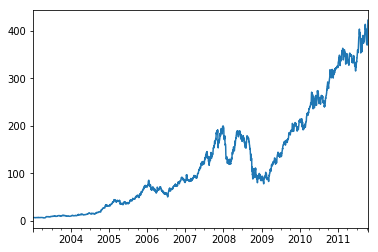

In [229]:
%matplotlib inline
close_px['AAPL'].plot()

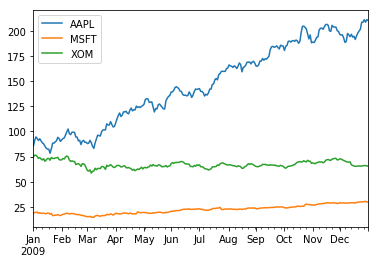

In [230]:
close_px.ix['2009'].plot()

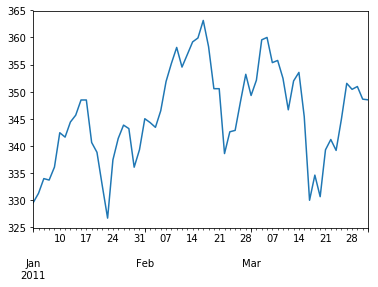

In [231]:
close_px['AAPL'].ix['01-2011' : '03-2011'].plot()

In [232]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()

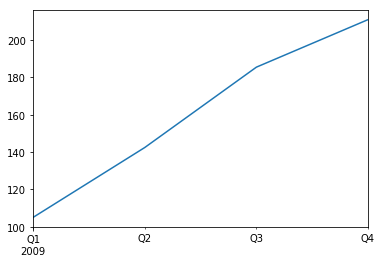

In [233]:
appl_q.ix['2009'].plot()

# 移动窗口函数

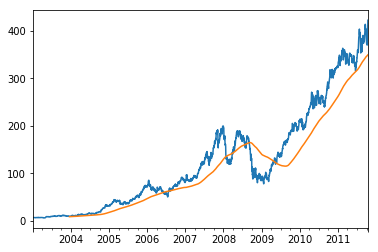

In [234]:
close_px.AAPL.plot()
close_px.AAPL.rolling(window = 250, center = False).mean().plot()

In [235]:
appl_std250 = close_px.AAPL.rolling(window = 250, center = False, min_periods = 10).std()

In [236]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [237]:
expanding_mean = lambda x: x.rolling(len(x), min_periods = 1)

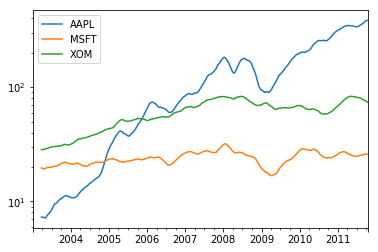

In [238]:
close_px.rolling(window = 60).mean().plot(logy = True)

## 指数加权函数

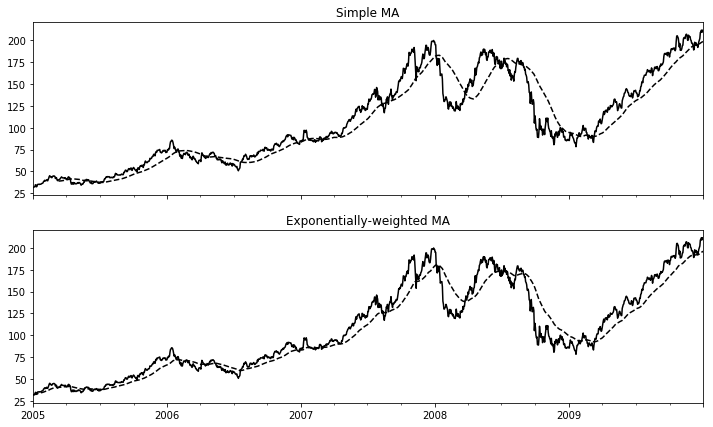

In [239]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True, figsize = (12, 7))
aapl_px = close_px.AAPL['2005' : '2009']

ma60 = aapl_px.rolling(60, min_periods = 50).mean()
ewma60 = aapl_px.ewm(ignore_na = False, span = 60, min_periods = 0, adjust = True).mean()

aapl_px.plot(style = 'k-', ax = axes[0])
ma60.plot(style = 'k--', ax = axes[0])

aapl_px.plot(style = 'k-', ax = axes[1])
ewma60.plot(style = 'k--', ax = axes[1])

axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

## 二元移动窗口函数

In [240]:
spx_px = close_px_all['SPX']

In [241]:
spx_rets = spx_px / spx_px.shift(1) - 1

In [242]:
returns = close_px.pct_change()

In [243]:
corr = returns.AAPL.rolling(min_periods = 100, window = 125).corr(other = spx_rets)

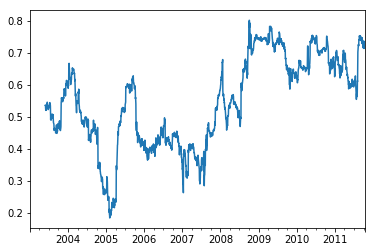

In [244]:
corr.plot()

In [245]:
corr = returns.rolling(min_periods = 100, window = 125).corr(other = spx_rets)

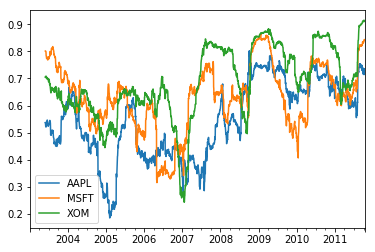

In [246]:
corr.plot()

## 用户定义的移动窗口函数

In [247]:
from scipy.stats import percentileofscore

In [248]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [249]:
returns.AAPL.rolling(center = False, window = 250).apply(score_at_2percent)

2003-01-02     NaN
2003-01-03     NaN
2003-01-06     NaN
2003-01-07     NaN
2003-01-08     NaN
2003-01-09     NaN
2003-01-10     NaN
2003-01-13     NaN
2003-01-14     NaN
2003-01-15     NaN
2003-01-16     NaN
2003-01-17     NaN
2003-01-20     NaN
2003-01-21     NaN
2003-01-22     NaN
2003-01-23     NaN
2003-01-24     NaN
2003-01-27     NaN
2003-01-28     NaN
2003-01-29     NaN
2003-01-30     NaN
2003-01-31     NaN
2003-02-03     NaN
2003-02-04     NaN
2003-02-05     NaN
2003-02-06     NaN
2003-02-07     NaN
2003-02-10     NaN
2003-02-11     NaN
2003-02-12     NaN
              ... 
2011-09-05    92.4
2011-09-06    92.4
2011-09-07    92.4
2011-09-08    92.4
2011-09-09    92.4
2011-09-12    92.4
2011-09-13    92.4
2011-09-14    92.4
2011-09-15    92.4
2011-09-16    92.4
2011-09-19    92.0
2011-09-20    92.4
2011-09-21    92.4
2011-09-22    92.4
2011-09-23    92.4
2011-09-26    92.4
2011-09-27    92.4
2011-09-28    92.4
2011-09-29    92.4
2011-09-30    92.8
2011-10-03    92.8
2011-10-04  

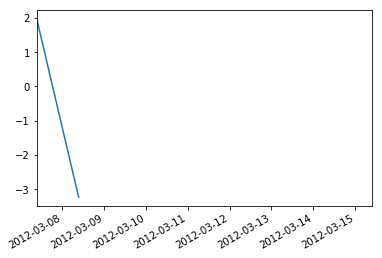

In [250]:
result.plot()

# 性能和内存使用方面的注意事项

In [251]:
rng = pd.date_range('1/1/2000', periods = 10000000, freq = '10ms')

In [252]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [253]:
ts[1: 20]

2000-01-01 00:00:00.010   -1.425555
2000-01-01 00:00:00.020   -1.486894
2000-01-01 00:00:00.030   -2.012845
2000-01-01 00:00:00.040   -1.154949
2000-01-01 00:00:00.050   -0.267648
2000-01-01 00:00:00.060    1.337760
2000-01-01 00:00:00.070   -0.377340
2000-01-01 00:00:00.080    0.910082
2000-01-01 00:00:00.090   -0.396711
2000-01-01 00:00:00.100    0.792159
2000-01-01 00:00:00.110    0.088699
2000-01-01 00:00:00.120    0.467102
2000-01-01 00:00:00.130   -0.373408
2000-01-01 00:00:00.140   -0.134657
2000-01-01 00:00:00.150    0.189141
2000-01-01 00:00:00.160   -0.708211
2000-01-01 00:00:00.170    0.649424
2000-01-01 00:00:00.180    1.661040
2000-01-01 00:00:00.190    0.599738
Freq: 10L, dtype: float64

In [254]:
ts.resample('15min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,1.335093,4.359099,-4.461533,-0.971370
2000-01-01 00:15:00,-1.056099,4.684952,-3.969367,-1.017909
2000-01-01 00:30:00,-0.010323,4.268485,-4.113098,1.619992
2000-01-01 00:45:00,-1.486459,5.277911,-4.114272,1.657350
2000-01-01 01:00:00,-0.065395,4.570105,-4.128512,1.071291
2000-01-01 01:15:00,0.810109,4.349476,-4.600753,-0.032930
2000-01-01 01:30:00,1.254009,4.857961,-4.549117,0.627028
2000-01-01 01:45:00,0.034666,4.768635,-3.939850,-0.828227
2000-01-01 02:00:00,0.837707,3.979242,-4.314781,-1.167191
2000-01-01 02:15:00,-0.525339,4.149317,-3.899083,-0.584087


In [255]:
%timeit ts.resample('15min').ohlc()

10 loops, best of 3: 98.7 ms per loop


In [256]:
rng = pd.date_range('1/1/2000', periods = 1000000, freq = '1s')

In [257]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [258]:
%timeit ts.resample('15s').ohlc()

100 loops, best of 3: 11.4 ms per loop
